In [ ]:
import warnings
warnings.filterwarnings('ignore')

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import torch
import re
from transformers import pipeline
from wordcloud import WordCloud, STOPWORDS

In [ ]:
df_path = './results/stocktwits_sentiment.csv'
df = pd.read_csv(df_path)

In [ ]:
df.head()

Primeiras entradas:


,id,symbol,post_id,post_author,post_date,post_text,post_likes,post_comments,post_reshares
0,1,AAPL,607389516,Michael_H_007,2025-03-10 00:34:57,$TSLA\n $DJT\n $SPY\n $AAPL\n \nTesla makes a...,0,0,0
1,2,AAPL,607389446,NinjaBaseballBatMan,2025-03-10 00:34:10,$AAPL\n $DJT\n $SPY\n $TSLA\n Bulls \nBearish,0,0,0
2,3,AAPL,607389425,Michael_H_007,2025-03-10 00:33:54,$TSLA\n $DJT\n $SPY\n $AAPL\n \nmsnbc.com/opi...,0,0,0
3,4,AAPL,607389374,Michael_H_007,2025-03-10 00:33:17,$TSLA\n $DJT\n $SPY\n $AAPL\n \nvanityfair.co...,0,0,0
4,5,AAPL,607389304,Michael_H_007,2025-03-10 00:32:34,$TSLA\n $DJT\n $SPY\n $AAPL\n \ndeccanherald....,0,0,0


In [ ]:
df.info()


Informações do dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1011422 entries, 0 to 1011421
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   id             1011422 non-null  int64         
 1   symbol         1011422 non-null  object        
 2   post_id        1011422 non-null  int64         
 3   post_author    1011422 non-null  object        
 4   post_date      1011422 non-null  datetime64[ns]
 5   post_text      1011422 non-null  object        
 6   post_likes     1011422 non-null  int64         
 7   post_comments  1011422 non-null  int64         
 8   post_reshares  1011422 non-null  int64         
dtypes: datetime64[ns](1), int64(5), object(3)
memory usage: 69.4+ MB


In [ ]:
def clean_text_for_finbert(text):
    if isinstance(text, str):
        text = re.sub(r'@\w+|https?://\S+', '', text)
        text = re.sub(r'[^\w\s$#]', '', text)

        return text.lower().strip()
    return ""

df['cleaned_text'] = df['post_text'].apply(clean_text_for_finbert)

In [ ]:
classifier = pipeline(
    "sentiment-analysis",
    model="StephanAkkerman/FinTwitBERT-sentiment",
    device=0 if torch.cuda.is_available() else -1
)

all_texts = df['cleaned_text'].tolist()
results = classifier(
    all_texts, 
    batch_size=32, 
    truncation=True, 
    padding=True, 
    max_length=512
)

df['sentiment_label'] = [result['label'] for result in results]
df['confidence'] = [result['score'] for result in results]


print(df.head())

Device set to use cpu


   id symbol    post_id          post_author           post_date  \
0   1   AAPL  607389516        Michael_H_007 2025-03-10 00:34:57   
1   2   AAPL  607389446  NinjaBaseballBatMan 2025-03-10 00:34:10   
2   3   AAPL  607389425        Michael_H_007 2025-03-10 00:33:54   
3   4   AAPL  607389374        Michael_H_007 2025-03-10 00:33:17   
4   5   AAPL  607389304        Michael_H_007 2025-03-10 00:32:34   

                                           post_text  post_likes  \
0  $TSLA\n $DJT\n $SPY\n $AAPL\n  \nTesla makes a...           0   
1      $AAPL\n $DJT\n $SPY\n $TSLA\n Bulls \nBearish           0   
2  $TSLA\n $DJT\n $SPY\n $AAPL\n  \nmsnbc.com/opi...           0   
3  $TSLA\n $DJT\n $SPY\n $AAPL\n  \nvanityfair.co...           0   
4  $TSLA\n $DJT\n $SPY\n $AAPL\n  \ndeccanherald....           0   

   post_comments  post_reshares  \
0              0              0   
1              0              0   
2              0              0   
3              0              0   
4      

In [ ]:
df.to_csv("../data/stocktwits_sentiment.csv", index=False)

In [ ]:
if not pd.api.types.is_datetime64_any_dtype(df['post_date']):
    df['post_date'] = pd.to_datetime(df['post_date'], errors='coerce')

cutoff = pd.to_datetime('2024-12-01')
df = df[df['post_date'] >= cutoff].copy()

print(f"Posts with post_date >= {cutoff.date()}: {len(df)}")
df.head()


Registros com post_date >= 2024-12-01: 953209


,id,symbol,post_id,post_author,post_date,post_text,post_likes,post_comments,post_reshares,cleaned_text,sentiment_label,confidence,sentiment
0,1,AAPL,607389516,Michael_H_007,2025-03-10 00:34:57,$TSLA\n $DJT\n $SPY\n $AAPL\n \nTesla makes a...,0,0,0,$tsla\n $djt\n $spy\n $aapl\n \ntesla makes a...,BEARISH,0.999581,-1
1,2,AAPL,607389446,NinjaBaseballBatMan,2025-03-10 00:34:10,$AAPL\n $DJT\n $SPY\n $TSLA\n Bulls \nBearish,0,0,0,$aapl\n $djt\n $spy\n $tsla\n bulls \nbearish,BEARISH,0.869412,-1
2,3,AAPL,607389425,Michael_H_007,2025-03-10 00:33:54,$TSLA\n $DJT\n $SPY\n $AAPL\n \nmsnbc.com/opi...,0,0,0,$tsla\n $djt\n $spy\n $aapl\n \nmsnbccomopini...,BEARISH,0.789024,-1
3,4,AAPL,607389374,Michael_H_007,2025-03-10 00:33:17,$TSLA\n $DJT\n $SPY\n $AAPL\n \nvanityfair.co...,0,0,0,$tsla\n $djt\n $spy\n $aapl\n \nvanityfaircom...,BEARISH,0.986979,-1
4,5,AAPL,607389304,Michael_H_007,2025-03-10 00:32:34,$TSLA\n $DJT\n $SPY\n $AAPL\n \ndeccanherald....,0,0,0,$tsla\n $djt\n $spy\n $aapl\n \ndeccanheraldc...,BEARISH,0.991462,-1


In [ ]:
sentiment_counts = df['sentiment_label'].value_counts()
print(sentiment_counts)

print(f"\Confidence Mean: {df['confidence'].mean():.4f}")



Distribuição de Sentimentos:
sentiment_label
BULLISH    470724
BEARISH    366271
NEUTRAL    116214
Name: count, dtype: int64

Confiança Média: 0.8281


In [ ]:
symbols = df['symbol'].unique()
symbols = [str(s).lower() for s in symbols]
extras = []
for s in symbols:
    if s.endswith('-usd'):
        base = s[:-4]
        extras.append(base)
        extras.append(base + 'x')
symbols += extras
symbols = list(dict.fromkeys(symbols))
my_stopwords = set(STOPWORDS)
my_stopwords.update(symbols + ["stock", "market", "going", "bullish", "bearish", "xrpx", "btcx", "dogex",
                               "ethx", "now", "will", "today", "today", "need", "see", "make", "look",
                               "still", "time", "year", "new", "oneday", "well", "think", "row", "company",
                               "markets", "money", "buy", "good", "dip", "sell", "sold", "dump", "shit", 
                               "bear", "bull", "lol", "4chanx", "solx", "one", "u"])

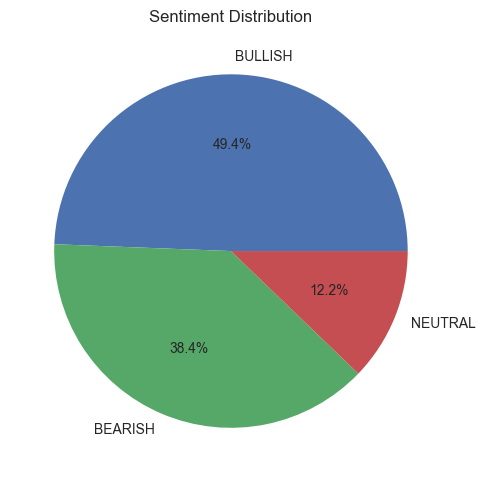

In [ ]:
plt.style.use('seaborn-v0_8')
fig, ax1 = plt.subplots(figsize=(5, 5))
ax1.pie(sentiment_counts.values, labels=sentiment_counts.index, autopct='%1.1f%%')
ax1.set_title('Sentiment Distribution')
plt.tight_layout()
plt.show()

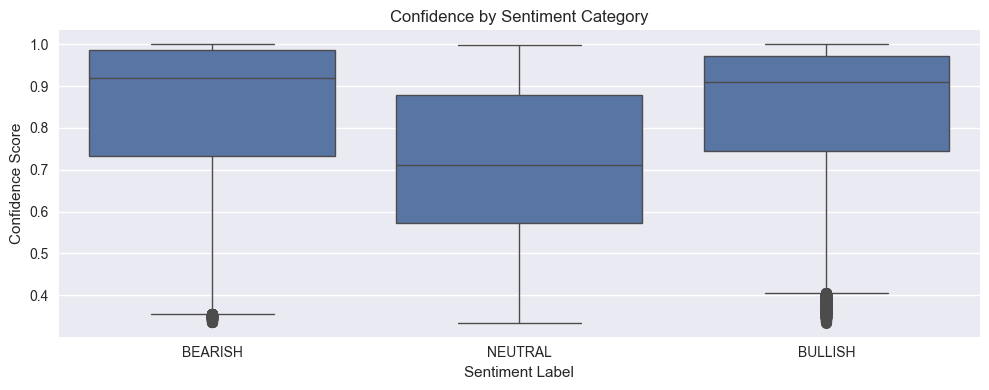

In [ ]:
fig, ax2 = plt.subplots(figsize=(10, 4))
sns.boxplot(data=df, x='sentiment_label', y='confidence', ax=ax2)
ax2.set_title('Confidence by Sentiment Category')
ax2.set_xlabel('Sentiment Label')
ax2.set_ylabel('Confidence Score')
plt.tight_layout()
plt.show()

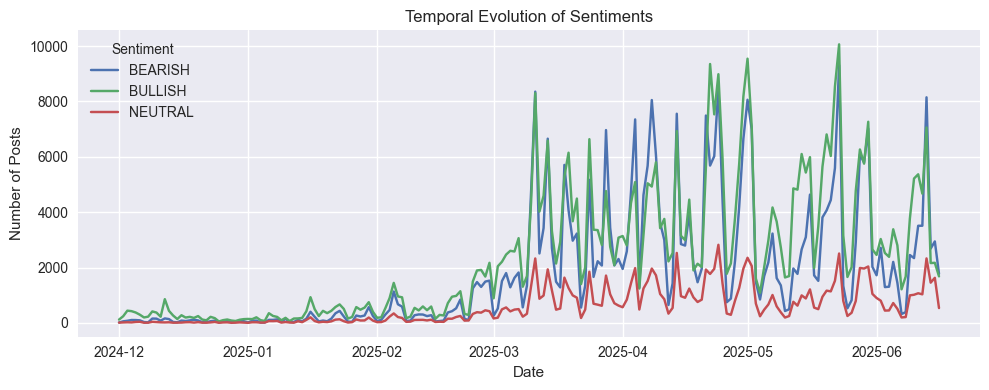

In [ ]:
fig, ax3 = plt.subplots(figsize=(10, 4))
df['post_date'] = pd.to_datetime(df['post_date'])
daily_sentiment = df.groupby([df['post_date'].dt.date, 'sentiment_label']).size().unstack()
daily_sentiment.plot(kind='line', ax=ax3)
ax3.set_title('Temporal Evolution of Sentiments')
ax3.set_xlabel('Date')
ax3.set_ylabel('Number of Posts')
ax3.legend(title='Sentiment')
plt.tight_layout()
plt.show()

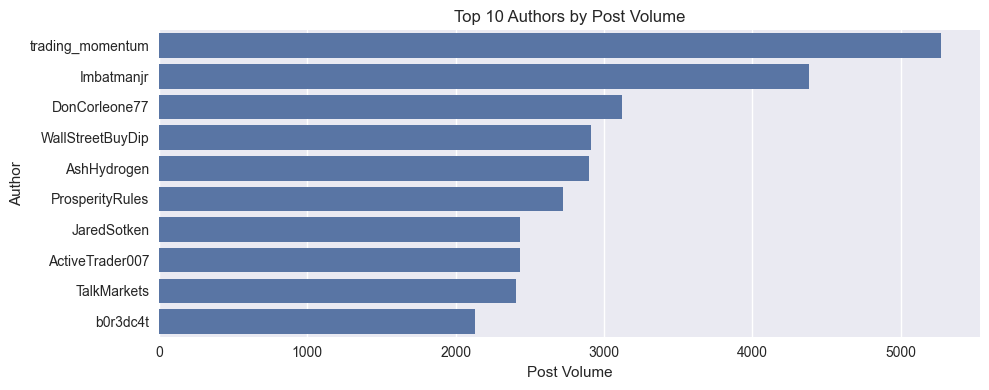

In [ ]:
fig, ax4 = plt.subplots(figsize=(10, 4))
top_authors = df['post_author'].value_counts().head(10)
sns.barplot(y=top_authors.index, x=top_authors.values, ax=ax4)
ax4.set_title('Top 10 Authors by Post Volume')
ax4.set_xlabel('Post Volume')
ax4.set_ylabel('Author')
plt.tight_layout()
plt.show()

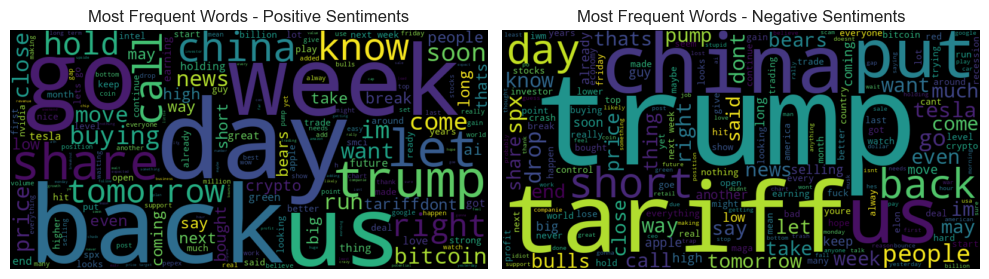

In [ ]:
fig_wc, axes_wc = plt.subplots(1, 2, figsize=(10, 5))

positive_texts = ' '.join(df[df['sentiment_label']=='BULLISH']['cleaned_text'])
wordcloud_pos = WordCloud(width=800, height=400, stopwords=my_stopwords).generate(positive_texts)
axes_wc[0].imshow(wordcloud_pos, interpolation='bilinear')
axes_wc[0].set_title('Most Frequent Words - Positive Sentiments')
axes_wc[0].axis('off')

negative_texts = ' '.join(df[df['sentiment_label']=='BEARISH']['cleaned_text'])
wordcloud_neg = WordCloud(width=800, height=400, stopwords=my_stopwords).generate(negative_texts)
axes_wc[1].imshow(wordcloud_neg, interpolation='bilinear')
axes_wc[1].set_title('Most Frequent Words - Negative Sentiments')
axes_wc[1].axis('off')

plt.tight_layout()
plt.show()


Sentiment Score Global: 0.1096


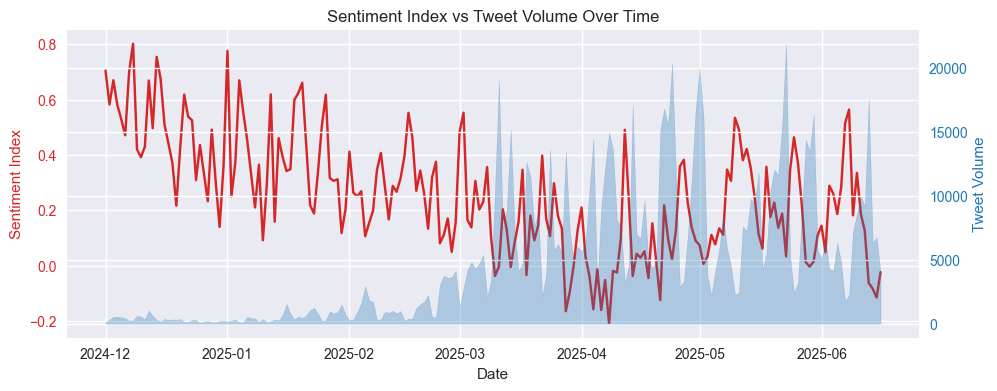

In [ ]:
df['sentiment'] = df['sentiment_label'].map({'BEARISH': -1, 'NEUTRAL': 0, 'BULLISH': 1})

sentiment_score = df['sentiment'].mean()
print(f"\nSentiment Score Global: {sentiment_score:.4f}")

daily_index = df.groupby(df['post_date'].dt.date).agg({
    'sentiment': 'mean',
    'confidence': 'mean',
    'cleaned_text': 'count'
}).rename(columns={'cleaned_text': 'volume'})

fig, ax1 = plt.subplots(figsize=(11, 4))

color = 'tab:red'
ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment Index', color=color)
ax1.plot(daily_index.index, daily_index['sentiment'], color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()
color = 'tab:blue'
ax2.set_ylabel('Tweet Volume', color=color)
ax2.fill_between(daily_index.index, daily_index['volume'], alpha=0.3, color=color)
ax2.tick_params(axis='y', labelcolor=color)

plt.title('Sentiment Index vs Tweet Volume Over Time')
plt.show()

In [ ]:
print("\n--- Detailed Statistics ---")
print(f"Total tweets processed: {len(df)}")
print(f"Bullish tweet rate: {(df['sentiment_label']=='BULLISH').sum()/len(df)*100:.2f}%")
print(f"Bearish tweet rate: {(df['sentiment_label']=='BEARISH').sum()/len(df)*100:.2f}%")
print(f"Neutral tweet rate: {(df['sentiment_label']=='NEUTRAL').sum()/len(df)*100:.2f}%")
print(f"Average confidence: {df['confidence'].mean():.4f} ± {df['confidence'].std():.4f}")

author_sentiment = df.groupby('post_author').agg({
    'sentiment': 'mean',
    'cleaned_text': 'count'
}).rename(columns={'cleaned_text': 'total_tweets'})

print("\nTop 10 Authors by Volume:")
print(author_sentiment.sort_values('total_tweets', ascending=False).head(10))


--- Detailed Statistics ---
Total tweets processed: 953209
Bullish tweet rate: 49.38%
Bearish tweet rate: 38.43%
Neutral tweet rate: 12.19%
Average confidence: 0.8281 ± 0.1694

Top 10 Authors by Volume:
                  sentiment  total_tweets
post_author                              
trading_momentum   0.228945          5272
Imbatmanjr         0.953435          4381
DonCorleone77      0.114560          3125
WallStreetBuyDip   0.690010          2913
AshHydrogen        0.320345          2900
ProsperityRules    0.966997          2727
JaredSotken        0.609606          2436
ActiveTrader007   -0.927661          2433
TalkMarkets       -0.233707          2409
b0r3dc4t           0.927700          2130
